In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("incl/")

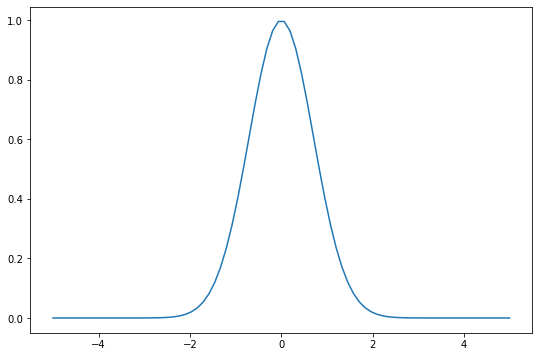

In [2]:
from scipy.special import eval_hermite


x = np.linspace(-5,5,80)

h = eval_hermite(0,x)

plt.plot(x,h*np.exp(-x**2))
plt.show()

In [3]:

x = np.linspace(-0,10,11)
x = x[1:]
dx = x[1]-x[0]

print(x)

inner = eval_hermite(2,x) @ (eval_hermite(10,x) * np.exp(-x**2) * dx)

print(inner)


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
45342.66336723726


In [16]:
import ELPH_utils
runs = ELPH_utils.load_runs(filename='../runs_rand_inits.npz')
# runs = runs[:100:1]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

data_matrix = np.concatenate(runs, axis=1)

500 loaded with n_kmax = 80


(60, 400)
(80, 400)


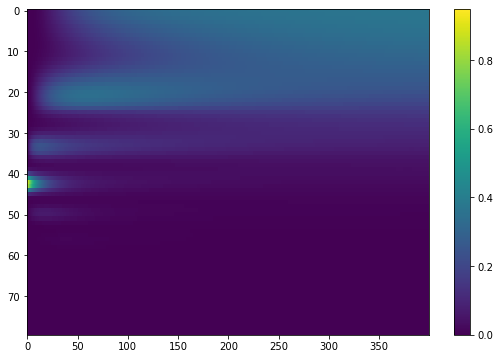

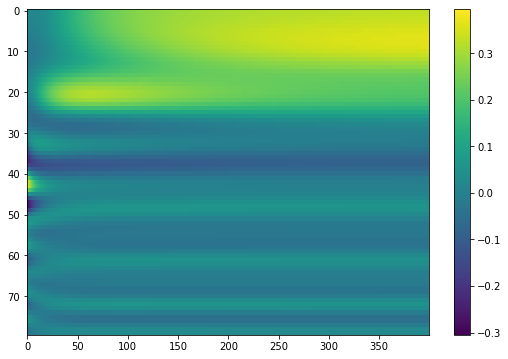

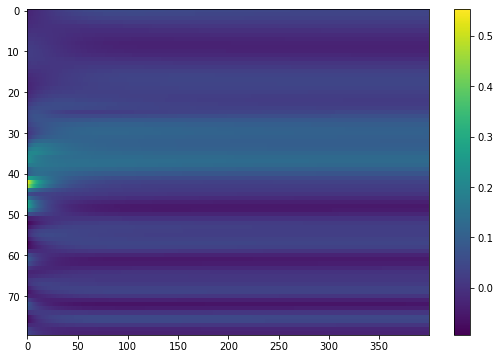

In [22]:
from ELPH_Dim_Reducer import Hermite

k = np.linspace(0,2.0,80)
HermiteReducer = Hermite(k**2)

HermiteReducer.train(data_matrix)


test = runs[85]

red_coef_matrix = HermiteReducer.reduce(test,60)
print(red_coef_matrix.shape)

recon = HermiteReducer.expand(red_coef_matrix)
print(recon.shape)

plt.imshow(test, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(test - recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()